# Implementing Simple Linear Regression ( Gradient Descent[vectorized] )

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating x data

slope = 3
intercept = 10

x = 5*np.random.rand(100,1)
y = intercept + slope*x +np.random.randn(100,1)

In [3]:
theta = np.random.randint(-10,10,(1,2))

In [5]:
x_gd = np.hstack([np.ones((len(x),1)),x])

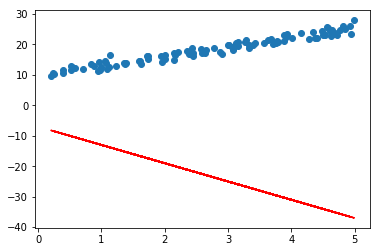

In [6]:
y_pred = np.dot(x_gd,theta.T)

plt.scatter(x,y)
plt.plot(x,y_pred,'-r')

#### 1. Implementing Gradient Descent 

Cost $$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$
Gradients $$
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
$$$$
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
$$$$
\theta_2: = \theta_2-\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)})
$$

In [7]:
def compute_error(x_gd,y,theta):
    y_hat = np.dot(x_gd,theta.T)
    return sum((y-y_hat)**2 )/(len(y)*2)

In [8]:
def gradient_descent(x_gd,y,theta,learning_rate=0.0001,iterations = 10000):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    precision = 0.01
    
    for it in range(iterations):
        y_hat = np.dot(x_gd,theta.T)
        
        error = compute_error(x_gd,y,theta)
        
        theta = theta-((1/len(y))*learning_rate*(np.dot(x_gd.T,(y_hat-y)))).T
        
        theta_history[it,:] = theta
        cost_history[it] = error
    
    return theta,cost_history,theta_history
                                                    
        
        

In [9]:
# calculating theta and cost_history and theta_history

theta,cost_history,theta_history = \
    gradient_descent(x_gd,y,theta,learning_rate=0.0001,iterations = 10000)

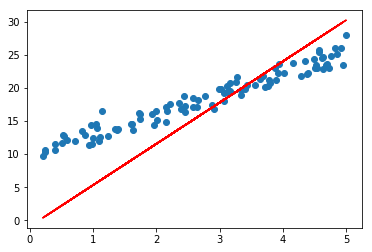

In [10]:
y_pred = np.dot(x_gd,theta.T)

plt.scatter(x,y)
plt.plot(x,y_pred,'-r')

In [11]:
cost_history

array([958.70959776, 956.75567342, 954.805808  , ...,  12.86207691,
        12.86159237,  12.86110785])

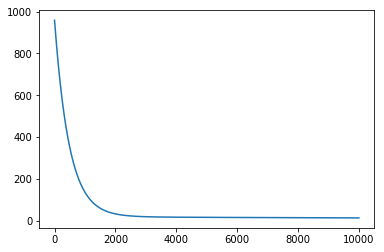

In [12]:
# plotting cost funciton and iterations

plt.plot(range(10000),cost_history)